***Submitted By Deepak***

In [0]:
import pandas as pd
import numpy as np
from scipy.stats import mstats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [0]:
df = pd.read_csv('/content/dataset_model.csv' , sep=',')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [87]:
df_data.shape

(614, 12)

In [88]:
df_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [0]:
df_data=df.drop(columns='Loan_ID')

In [0]:
tar_Var = df['Loan_Status']
df = df.drop(columns='Loan_Status')

In [0]:
cont_col=[i for i in df_data if len(df_data[i].unique())>5]
cat_cols=[i for i in df_data if len(df_data[i].unique())<5]

In [0]:
#Checking skew and Data distribution before handling outliers
for i in cont_col:
  print(str(i)+' : '+str(df_data[i].skew()))

ApplicantIncome : 6.539513113994625
CoapplicantIncome : 7.491531216657306
LoanAmount : 2.677551679256059
Loan_Amount_Term : -2.362414124216269


In [0]:
print("0 to 25% \n",df_data.quantile(0)) 
print("25% to 50%\n",df_data.quantile(0.25))
print("50% to 75%\n",df_data.quantile(0.50)) 
print("75% t0 100%\n",df_data.quantile(0.75))

0 to 25% 
 ApplicantIncome      150.0
CoapplicantIncome      0.0
LoanAmount             9.0
Loan_Amount_Term      12.0
Credit_History         0.0
Name: 0, dtype: float64
25% to 50%
 ApplicantIncome      2877.5
CoapplicantIncome       0.0
LoanAmount            100.0
Loan_Amount_Term      360.0
Credit_History          1.0
Name: 0.25, dtype: float64
50% to 75%
 ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            128.0
Loan_Amount_Term      360.0
Credit_History          1.0
Name: 0.5, dtype: float64
75% t0 100%
 ApplicantIncome      5795.00
CoapplicantIncome    2297.25
LoanAmount            168.00
Loan_Amount_Term      360.00
Credit_History          1.00
Name: 0.75, dtype: float64


***Handling outliers***

In [0]:
for i in cont_col:
#Defining lower and upper cuttoff values 
  lower_cutoff = df_data[i].quantile(0.05)
  upper_cutoff = df_data[i].quantile(0.95)
#Replacing the outlier from threshold range
  df_data[i] = np.where(df_data[i] < lower_cutoff,lower_cutoff,df_data[i])
  df_data[i] = np.where(df_data[i] > upper_cutoff, upper_cutoff,df_data[i])
#Checking the skew right after outlier handling
  print("skewness of data after handling outlier  "+str(i)+' : '+str(df_data[i].skew()))

skewness of data after handling outlier  ApplicantIncome : 1.7637799807028802
skewness of data after handling outlier  CoapplicantIncome : 0.8452039718003408
skewness of data after handling outlier  LoanAmount : 1.0594654991821644
skewness of data after handling outlier  Loan_Amount_Term : -2.600073144736368


In [0]:
#checking summary of missing data
df_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

***Handling Missing Values***

In [0]:
#Handling missing values
for i in df_data.columns:
  df_data[i]=df_data[i].fillna(df_data[i].value_counts().nlargest(n=1).index[0])
df_data.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

***Encoding By Label Encoding***

In [0]:
df_enc2=df_enc.drop(columns=['Loan_Status_enc','Dependents'],axis=1)
df_enc2.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_enc,Married_enc,Education_enc,Self_Employed_enc,Credit_History_enc,Property_Area_enc
0,5849.0,0.0,56.0,360.0,1,0,0,0,1,2
1,4583.0,1508.0,128.0,360.0,1,1,0,0,1,0
2,3000.0,0.0,66.0,360.0,1,1,0,1,1,2
3,2583.0,2358.0,120.0,360.0,1,1,1,0,1,2
4,6000.0,0.0,141.0,360.0,1,0,0,0,1,2


In [0]:
#Encoding target variable
df_target=pd.DataFrame(le.fit_transform(df_data['Loan_Status']))
df_target.columns=(['Loan_Status'])
df_target.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


***Splitting Data***

**Logistic Regression**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(df_enc2,df_target,test_size=0.25,stratify=df_target)

In [0]:
print("Train Feature set:\t"+str(len(X_train)))
print("Train Label Feature set:\t"+str(len(Y_train)))
print("Test Feature set:\t"+str(len(X_test)))
print("Test label set:\t"+str(len(Y_test)))

Train Feature set:	460
Train Label Feature set:	460
Test Feature set:	154
Test label set:	154


In [0]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))
print("Accuracy of Dtree Model:")
print(accuracy_score(Y_test, y_pred))
print("Precision of DTree Model:")
print (precision_score(Y_test, y_pred))
print ("Recall of DTree Model:" )
print( recall_score(Y_test, y_pred))
print ("F1 Score of DTree Model:")
print (f1_score(Y_test, y_pred))

Confusion Matrix
[[ 21  27]
 [  3 103]]
Accuracy of Dtree Model:
0.8051948051948052
Precision of DTree Model:
0.7923076923076923
Recall of DTree Model:
0.9716981132075472
F1 Score of DTree Model:
0.8728813559322033


In [0]:
print("AUROC Value:\n",roc_auc_score(Y_test,y_pred))

AUROC Value:
 0.7045990566037736


**Random Forest Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=50)
rf.fit(X_train,Y_train)
y_pred2=rf.predict(X_test)
y_pred2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [0]:
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred2))
print("Accuracy of Dtree Model:")
print(accuracy_score(Y_test, y_pred2))
print("Precision of DTree Model:")
print (precision_score(Y_test, y_pred2))
print ("Recall of DTree Model:" )
print( recall_score(Y_test, y_pred2))
print ("F1 Score of DTree Model:")
print (f1_score(Y_test, y_pred2))

Confusion Matrix
[[23 25]
 [ 9 97]]
Accuracy of Dtree Model:
0.7792207792207793
Precision of DTree Model:
0.7950819672131147
Recall of DTree Model:
0.9150943396226415
F1 Score of DTree Model:
0.8508771929824561


In [0]:
print("AUROC Value:\n",roc_auc_score(Y_test,y_pred2))

AUROC Value:
 0.6971305031446541


***One Hot Encoding***

In [80]:
df_ohe=df_data.copy()
for j in cat_cols:
  df_ohe=pd.get_dummies(df_ohe,columns=[j],prefix=[j])
df_ohe.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,5849.0,0.0,56.0,360.0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,1,0,0,0
1,4583.0,1508.0,128.0,360.0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0
2,3000.0,0.0,66.0,360.0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,1,0,0,0
3,2583.0,2358.0,120.0,360.0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,1,0,0,0
4,6000.0,0.0,141.0,360.0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,1,0,0,0


In [0]:
#cat_cols.append('Dependents')
del cat_cols[7]


In [79]:
cat_cols

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status',
 'Dependents']

In [0]:
a=df_ohe.drop(columns='Loan_Status_N')
b=a.drop(columns='Loan_Status_Y')

In [99]:
b.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_0.0',
       'Credit_History_1.0', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+'],
      dtype='object')

In [0]:
#Splitting the dataset into 25% as test_set, 75% as train size
X_train_oHE, X_test_oHE, y_train_oHE, y_test_oHE = train_test_split(b, df_target, test_size=0.25, random_state=42, stratify=df_target)

In [101]:
#Training on default variables
model.fit(X_train_oHE, y_train_oHE)
y_pred3 = model.predict(X_test_oHE)
accuracy_score(y_test_oHE, y_pred3)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8506493506493507

In [102]:
#Training model on default Parameters
rf.fit(X_train_oHE, y_train_oHE)
y_pred4 = rf.predict(X_test_oHE)
accuracy_score(y_test_oHE, y_pred4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8376623376623377

In [103]:
print("Confusion Matrix:\n"+str(confusion_matrix(y_test_oHE, y_pred3)))
print("Accuracy of Dtree Model:")
print("%.2f"%round(accuracy_score(y_test_oHE, y_pred3)*100,2) + '%')
print("Precision of DTree Model:")
print ("%.2f" % round(precision_score(y_test_oHE, y_pred3)*100) + '%')
print ("Recall of DTree Model:" )
print("%.2f" % round(recall_score(y_test_oHE, y_pred3)*100) + '%')
print ("F1 Score of DTree Model:")
print ("%.2f" % round(f1_score(y_test_oHE, y_pred3)*100) + '%')

Confusion Matrix:
[[ 28  20]
 [  3 103]]
Accuracy of Dtree Model:
85.06%
Precision of DTree Model:
84.00%
Recall of DTree Model:
97.00%
F1 Score of DTree Model:
90.00%


In [104]:
print("Confusion Matrix:\n"+str(confusion_matrix(y_test_oHE, y_pred4)))
print("Accuracy of Dtree Model:")
print("%.2f"%round(accuracy_score(y_test_oHE, y_pred4)*100,2) + '%')
print("Precision of DTree Model:")
print ("%.2f" % round(precision_score(y_test_oHE, y_pred4)*100) + '%')
print ("Recall of DTree Model:" )
print("%.2f" % round(recall_score(y_test_oHE, y_pred4)*100) + '%')
print ("F1 Score of DTree Model:")
print ("%.2f" % round(f1_score(y_test_oHE, y_pred4)*100) + '%')

Confusion Matrix:
[[30 18]
 [ 7 99]]
Accuracy of Dtree Model:
83.77%
Precision of DTree Model:
85.00%
Recall of DTree Model:
93.00%
F1 Score of DTree Model:
89.00%


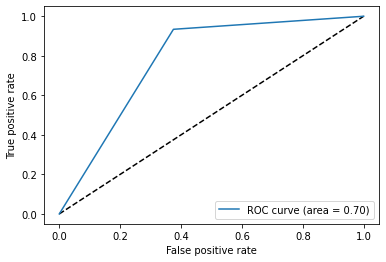

In [105]:
fpr, tpr, thresholds = roc_curve(y_test_oHE,y_pred4)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')